# Random user information with Faker

Faker is one of the best early Python libraries to generate all types of random information. Some commonly-used attributes Faker generate are:

- Personal info: name, birthday, email, password, address
- All kinds of date and timezone information
- Financial details: credit cards, SSNs, banking
- Misc: URLs, sentences, language codes

In [1]:
from faker import Faker

In [2]:
fake = Faker()

In [3]:
fake.name()

'Ronald Christian'

In [4]:
fake.address()

'188 Christopher Groves\nLake Lisabury, ID 48995'

In [5]:
fake.url()

'https://butler.com/'

In [6]:
import pandas as pd

df = pd.DataFrame(
    [
        {
            "name": fake.name(),
            "address": fake.address(),
            "birthday": fake.date_of_birth(),
            "email": fake.email(),
            "password": fake.password(),
        }
        for _ in range(1000)
    ]
)

In [7]:
df.sample(5)

,name,address,birthday,email,password
525,Susan Thompson,"904 Juan Inlet\nKristinfort, ME 67296",1922-07-02,twilliams@example.com,%(2LjhDcc@
648,Alexander Gonzalez,"89663 Melvin Courts Apt. 157\nSouth Sarahview,...",1958-06-20,katie78@example.org,+r5DLS#s_c
428,Dave Bird,"01266 Kelly Lock Apt. 202\nGomezland, MT 80178",1981-11-30,melissa06@example.net,5F8DrA)6*7
531,Philip Wright,Unit 1944 Box 4118\nDPO AA 12601,2011-12-28,zwagner@example.org,*eRaUskd0C
810,Ashley Olson,"0577 Werner Mission Apt. 634\nPort David, AZ 4...",1947-06-02,jensenalexandra@example.com,73&3PCj1Ns


If you notice, the name and email addresses do not match. That's one of the disadvantages of using Faker — Faker-generated datasets are easily identifiable when used in public.

# Synthetic datasets with Sklearn for ML tasks

In [8]:
from sklearn.datasets import make_classification, make_regression

X, y = make_classification(
    n_samples=5000, n_features=20, n_informative=15, n_classes=3, n_clusters_per_class=3
)

To control the difficulty of the task, you can specify how many features are useful or redundant with `n_informative` (correlated) or `n_redundant` (linear combinations of informative features) parameters.

`make_classification` also offers much control over the classification target, namely, the number of classes, clusters per class, and class weights.

In [9]:
X

array([[-1.03338882, -2.75057612, -1.11649685, ...,  2.52110591,
        -1.32055754, -0.20532895],
       [ 5.0452886 , -0.45083283, -1.00735087, ..., -3.42024526,
         4.57792316,  2.19413666],
       [-1.56877563, -5.28862537, -0.6912828 , ...,  1.45278056,
        -4.07765182, -2.58189881],
       ...,
       [-2.95954934, -1.39452265, -1.7707341 , ...,  0.79531789,
         0.45793831, -0.25954713],
       [-4.29471428,  1.9437877 , -1.55203724, ...,  6.65957231,
        -2.56846034,  2.85933412],
       [-1.5703609 , -3.74281988, -0.83105484, ...,  2.33880544,
        -3.03234545, -0.56178839]])

In [10]:
y

array([0, 0, 1, ..., 2, 0, 2])

In [11]:
X, y = make_regression(n_samples=5000, n_features=20, n_informative=10)

In [12]:
X

array([[-0.68904923,  0.04512798, -0.28240635, ..., -1.14391502,
        -0.14211078, -0.26204298],
       [-1.16699849,  1.65409217,  0.01268337, ...,  2.38839912,
         0.58319285,  1.21212171],
       [-0.16258561,  0.30794669, -1.43274188, ...,  0.00799355,
         2.24256018,  0.28526501],
       ...,
       [ 1.5065968 , -0.50809221, -1.35091381, ..., -0.77042826,
         0.50079992, -1.18498583],
       [-0.4853859 ,  1.49873949, -0.58842215, ..., -0.50823646,
        -0.93629143,  1.03159517],
       [ 2.041807  , -1.53904996,  0.83652578, ..., -0.47807383,
        -0.18504657, -1.02808215]])

In [13]:
y

array([-261.67131977,  127.22098865,   92.10054166, ...,  219.28510542,
        167.20602748,  183.64308767])

There is also the `make_blobs` function for generating clustering tasks as seen below:

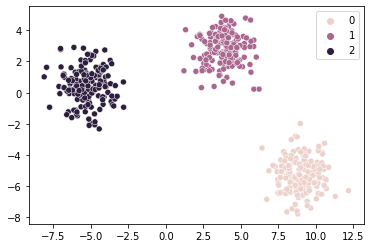

In [14]:
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

If you are looking for something fancy, there are other functions such as `make_checkerboard`, `make_circles`, `make_moons`, and `make_s_curve`.

# Dataset with outliers in PyOD

Anomaly detection is a ubiquitous problem in data science. But quality datasets with outliers are hard to come by if you want to practice. Fortunately, the Python Outlier Detection (PyOD) library has a utility function to generate synthetic data with outliers:

In [15]:
from pyod.utils.data import generate_data
import seaborn as sns
import matplotlib.pyplot as plt

X, y = generate_data(
    n_train=500, contamination=0.13, n_features=2, train_only=True, random_state=1
)

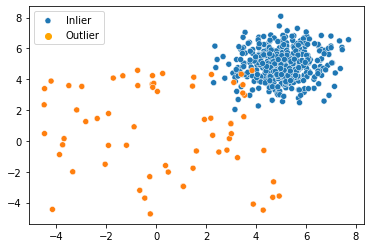

In [16]:
# Plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Modify the damn legend
legend = plt.legend(labels=['Inlier', 'Outlier'])
legend.legendHandles[1].set_color("orange")

The `generate_data` offers control over the number of rows in training and test sets and also the percentage of outliers in the resulting sets (`contamination`).

PyOD also has the largest suite of anomaly detection algorithms in the Python ecosystem.

# Synthetic data on top of another dataset with CTGAN

Now, onto the great stuff.

When you have limited data, it is hard for machine learning models to generalize well and not overfit. In such cases, you can use Conditional General Adversarial Networks — CTGAN.

After you fit it to any dataset, CTGAN can generate synthetic highly anonymous samples from the dataset's information space. This is a great way to increase both data security and dataset size.

CTGAN is provided by the Synthetic Data Vault (SDV) project. Its Python API exposes a `CTGAN` class that requires the dataset to be learned and a list of its categorical columns.

Then, you can draw as many samples from it as you want with the `sample` function. Below, we are sampling 20k synthetic samples from the cliché Iris dataset:

In [17]:
from ctgan import CTGAN

In [18]:
# Extract categorical data types
iris = sns.load_dataset("iris")
categoricals = iris.select_dtypes(exclude="number").columns.tolist()

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
categoricals

['species']

In [21]:
# Fit CTGAN
ctgan = CTGAN(epochs=10)
ctgan.fit(iris, categoricals)

In [22]:
# Generate the data
synthetic_iris = ctgan.sample(20000)
synthetic_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.722531,4.580059,0.665274,0.155525,versicolor
1,6.290473,3.790248,3.818858,0.097610,versicolor
2,5.579486,3.261914,0.877929,0.414763,versicolor
3,6.812155,3.446544,1.323666,1.079313,versicolor
4,5.322191,4.181237,1.192404,1.201457,versicolor
...,...,...,...,...,...
19995,6.184560,2.538351,1.097505,1.038922,virginica
19996,5.741780,2.833194,1.324196,0.035733,virginica
19997,4.684701,4.558695,6.768879,1.678543,versicolor
19998,4.759781,3.725639,-0.023654,0.283716,virginica


# Mimesis — Advanced Faker

Mimesis is a full-fledged random information generator built upon Faker. It can generate many, many more random attributes than Faker:

In [23]:
from mimesis import Generic
from mimesis.locales import Locale

In [24]:
# Spanish locale
fake = Generic(Locale.ES)

print(dir(fake))

['address', 'binaryfile', 'choice', 'code', 'cryptographic', 'datetime', 'development', 'file', 'finance', 'food', 'hardware', 'internet', 'locale', 'numeric', 'path', 'payment', 'person', 'science', 'text', 'transport']


Its random generators are grouped into 20 categories, which makes Mimesis much more organized.

It also greatly supports country-specific information for 32 locales (languages). Below, we are generating a thousand rows of fake Spanish data:

In [25]:
# Spanish locale
fake = Generic(Locale.ES)

df = pd.DataFrame(
    [
        {
            "name": fake.person.full_name(),
            "country": fake.address.country(),
            "birthday": fake.datetime.date(),
            "email": fake.person.email(),
            "password": fake.person.password(),
        }
        for _ in range(1000)
    ]
)

df.head()

,name,country,birthday,email,password
0,Brunilda Rey,España,2011-11-06,andale1949@example.org,"(Pqy+s,5"
1,Noelia Rey,España,2017-12-08,visited1971@yahoo.com,s8(4mm+B
2,Ana María Andres,España,2009-04-24,easier1834@outlook.com,"8K!T""~B\"
3,Maximiliano Suarez,España,2005-12-17,bush1865@example.org,hv(=$cIN
4,Kevin Duran,España,2010-07-08,posted1975@example.com,N%Rww!JX


You can also create custom locales where you combine multiple languages for area-specific information, i.e., data specific to western Europe.